In [ ]:
!pip install bertopic[visualization]
from bertopic import BERTopic

In [ ]:
# Load and filter the data
import numpy as np
data_file = './drive/MyDrive/arxiv-metadata-oai-snapshot.json'
embeddings_path = "/content/drive/My Drive/embeddings.npy"  # Update path to your file
embeddings = np.load(embeddings_path)

In [ ]:
import json
category_map = {'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'astro-ph.HE': 'High Energy Astrophysical Phenomena',
'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
'astro-ph.SR': 'Solar and Stellar Astrophysics',
'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
'cond-mat.mtrl-sci': 'Materials Science',
'cond-mat.other': 'Other Condensed Matter',
'cond-mat.quant-gas': 'Quantum Gases',
'cond-mat.soft': 'Soft Condensed Matter',
'cond-mat.stat-mech': 'Statistical Mechanics',
'cond-mat.str-el': 'Strongly Correlated Electrons',
'cond-mat.supr-con': 'Superconductivity',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'econ.EM': 'Econometrics',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory'}

def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line

titles = []
abstracts = []
years = []
categories = []
metadata = get_metadata()
for paper in metadata:
    paper_dict = json.loads(paper)
    ref = paper_dict.get('journal-ref')
    try:
        year = int(ref[-4:])
        if 2000 < year <= 2021:
            categories.append(category_map[paper_dict.get('categories').split(" ")[0]])
            years.append(year)
            titles.append(paper_dict.get('title'))
            abstracts.append(paper_dict.get('abstract'))
    except:
        pass

len(titles), len(abstracts), len(years), len(categories)

(150752, 150752, 150752, 150752)

In [ ]:
# Combine titles and abstracts for richer context
data = [title + " " + abstract for title, abstract in zip(titles, abstracts)]

In [ ]:
from bertopic import BERTopic

# Initialize BERTopic
topic_model = BERTopic()

# Use precomputed embeddings
topics, probs = topic_model.fit_transform(data, embeddings=embeddings)


In [ ]:
from copy import deepcopy
original_model = deepcopy(topic_model)

In [ ]:
from bertopic import BERTopic
import pandas as pd

# Function to reduce topics, get their distribution, and display information
def show_topic_distribution(original_model, docs, num_topics):
    print(f"\n=== Reducing to {num_topics} Topics ===")

    # Clone the original model to ensure isolation
    topic_model_clone = deepcopy(original_model)

    # Reduce topics
    topic_model_clone.reduce_topics(docs, nr_topics=num_topics)

    # Get topic information
    topic_info = topic_model_clone.get_topic_info()
    print(topic_info.head(10))  # Show top topics

    # Plot topic distribution
    topic_model_clone.visualize_barchart(top_n_topics=10).show()

    return topic_info

# Run for multiple topic numbers
num_topics_list = [1000, 500, 200, 100, 50, 20, 10]
topic_info_list = []

for num_topics in num_topics_list:
    topic_info = show_topic_distribution(original_model, data, num_topics)
    topic_info_list.append((num_topics, topic_info))

# Combine all topic info into a single DataFrame
all_topics_df = pd.concat(
    [df.assign(Num_Topics=num) for num, df in topic_info_list],
    ignore_index=True
)

# Save to CSV for inspection
all_topics_df.to_csv("topic_info_comparison.csv", index=False)




=== Reducing to 1000 Topics ===
   Topic  Count                                   Name  \
0     -1  77474                        -1_of_the_in_to   
1      0   2476             0_lattice_qcd_quark_chiral   
2      1   1468               1_dwarfs_dust_dwarf_disk   
3      2   1452  2_solar_coronal_magnetic_reconnection   
4      3   1253       3_language_text_word_translation   
5      4   1218           4_xray_chandra_kev_xmmnewton   
6      5    868             5_grb_grbs_afterglow_burst   
7      6    860  6_neutrino_seesaw_mixing_leptogenesis   
8      7    816               7_branching_b0_pi_decays   
9      8    713                 8_s5_ads5_bethe_string   

                                      Representation  \
0     [of, the, in, to, and, we, is, that, for, are]   
1  [lattice, qcd, quark, chiral, quenched, quarks...   
2  [dwarfs, dust, dwarf, disk, brown, white, emis...   
3  [solar, coronal, magnetic, reconnection, sunsp...   
4  [language, text, word, translation, corpus, s


=== Reducing to 500 Topics ===
   Topic  Count                                   Name  \
0     -1  77474                       -1_the_of_in_and   
1      0   3953             0_galaxies_stars_dust_star   
2      1   3163             1_lattice_qcd_quark_chiral   
3      2   2487               2_xray_grb_gammaray_grbs   
4      3   2077         3_higgs_neutrino_mixing_seesaw   
5      4   1632  4_algebra_algebras_lie_noncommutative   
6      5   1490  5_solar_magnetic_coronal_reconnection   
7      6   1439                    6_n4_s5_ads5_string   
8      7   1389              7_collisions_rhic_auau_pt   
9      8   1315          8_top_production_lhc_tevatron   

                                      Representation  \
0    [the, of, in, and, to, we, is, for, that, with]   
1  [galaxies, stars, dust, star, halo, galaxy, st...   
2  [lattice, qcd, quark, chiral, quarks, quenched...   
3  [xray, grb, gammaray, grbs, emission, afterglo...   
4  [higgs, neutrino, mixing, seesaw, electroweak,


=== Reducing to 200 Topics ===
   Topic  Count                                    Name  \
0     -1  77474                        -1_the_of_in_and   
1      0  12176               0_quark_qcd_at_production   
2      1  11555   1_xray_emission_galaxies_observations   
3      2   5764          2_gauge_theory_string_theories   
4      3   3694  3_inflation_brane_cosmological_gravity   
5      4   2808        4_neutrino_dark_matter_neutrinos   
6      5   2370              5_black_hole_holes_entropy   
7      6   1722         6_nuclei_reaction_nuclear_cross   
8      7   1534     7_amplitudes_gluon_propagator_gauge   
9      8   1384        8_language_text_word_translation   

                                      Representation  \
0    [the, of, in, and, to, we, is, for, that, with]   
1  [quark, qcd, at, production, decays, decay, co...   
2  [xray, emission, galaxies, observations, stars...   
3  [gauge, theory, string, theories, we, algebra,...   
4  [inflation, brane, cosmological, gr


=== Reducing to 100 Topics ===
   Topic  Count                                     Name  \
0     -1  77474                         -1_the_of_and_in   
1      0  17738                    0_at_the_neutrino_and   
2      1  13335                        1_the_of_xray_and   
3      2   8102                 2_theory_gauge_string_we   
4      3   7169                 3_black_hole_the_gravity   
5      4   1736                   4_quantum_of_the_model   
6      5   1648          5_learning_neural_deep_training   
7      6   1433         6_language_text_word_translation   
8      7   1186  7_quantum_classical_entanglement_states   
9      8   1175               8_magnetic_spin_phase_hall   

                                      Representation  \
0    [the, of, and, in, to, we, is, for, with, that]   
1  [at, the, neutrino, and, quark, of, in, qcd, f...   
2  [the, of, xray, and, with, from, in, emission,...   
3  [theory, gauge, string, we, the, in, of, field...   
4  [black, hole, the, gravi


=== Reducing to 50 Topics ===
   Topic  Count                                 Name  \
0     -1  77474                     -1_the_of_and_in   
1      0  31194                      0_the_of_and_in   
2      1  18182                       1_the_of_in_we   
3      2   2584             2_learning_to_neural_and   
4      3   1934               3_to_and_language_text   
5      4   1528           4_fractional_of_random_for   
6      5   1435  5_quantum_of_classical_entanglement   
7      6   1423                 6_of_we_group_groups   
8      7   1158               7_beam_detector_the_of   
9      8   1146               8_graph_graphs_of_that   

                                      Representation  \
0    [the, of, and, in, to, we, is, for, with, that]   
1      [the, of, and, in, to, with, at, we, for, is]   
2  [the, of, in, we, and, is, theory, to, for, that]   
3  [learning, to, neural, and, network, networks,...   
4  [to, and, language, text, social, on, of, in, ...   
5  [fractional, 


=== Reducing to 20 Topics ===
   Topic  Count                 Name  \
0     -1  77474     -1_the_of_and_in   
1      0  50575      0_the_of_and_in   
2      1   3931      1_to_and_the_of   
3      2   3486      2_and_to_of_the   
4      3   3116      3_of_the_we_and   
5      4   2569      4_the_of_and_in   
6      5   1891       5_of_the_is_we   
7      6   1549      6_the_to_of_and   
8      7   1492  7_quantum_of_the_to   
9      8   1158      8_the_and_to_of   

                                      Representation  \
0    [the, of, and, in, to, we, is, for, with, that]   
1    [the, of, and, in, to, we, is, with, for, that]   
2  [to, and, the, of, for, in, learning, is, we, on]   
3    [and, to, of, the, in, on, for, this, that, is]   
4      [of, the, we, and, for, is, in, on, to, that]   
5   [the, of, and, in, to, is, for, with, that, are]   
6  [of, the, is, we, and, that, for, graph, in, c...   
7    [the, to, of, and, in, that, for, is, we, this]   
8  [quantum, of, the, to


=== Reducing to 10 Topics ===
   Topic  Count                           Name  \
0     -1  77474               -1_the_of_and_in   
1      0  53443                0_the_of_and_in   
2      1   6279                1_the_and_of_to   
3      2   5007                2_of_the_we_and   
4      3   3486                3_and_of_the_to   
5      4   2066                4_the_and_of_to   
6      5   1735           5_quantum_of_the_and   
7      6    832          6_the_of_and_graphene   
8      7    377           7_the_of_control_and   
9      8     53  8_magnet_the_magnetic_halbach   

                                      Representation  \
0    [the, of, and, in, to, we, is, for, with, that]   
1    [the, of, and, in, to, we, is, for, with, that]   
2      [the, and, of, to, in, for, is, we, that, on]   
3      [of, the, we, and, is, for, in, to, that, on]   
4      [and, of, the, to, in, for, on, this, we, is]   
5    [the, and, of, to, in, for, is, this, we, that]   
6  [quantum, of, the, and,


=== Reducing to 1000 Topics ===
   Topic  Count                                   Name  \
0     -1  77474                        -1_of_the_in_to   
1      0   2476             0_lattice_qcd_quark_chiral   
2      1   1468               1_dwarfs_dust_dwarf_disk   
3      2   1452  2_solar_coronal_magnetic_reconnection   
4      3   1253       3_language_text_word_translation   
5      4   1218           4_xray_chandra_kev_xmmnewton   
6      5    868             5_grb_grbs_afterglow_burst   
7      6    860  6_neutrino_seesaw_mixing_leptogenesis   
8      7    816               7_branching_b0_pi_decays   
9      8    713                 8_s5_ads5_bethe_string   

                                      Representation  \
0     [of, the, in, to, and, we, is, that, for, are]   
1  [lattice, qcd, quark, chiral, quenched, quarks...   
2  [dwarfs, dust, dwarf, disk, brown, white, emis...   
3  [solar, coronal, magnetic, reconnection, sunsp...   
4  [language, text, word, translation, corpus, s

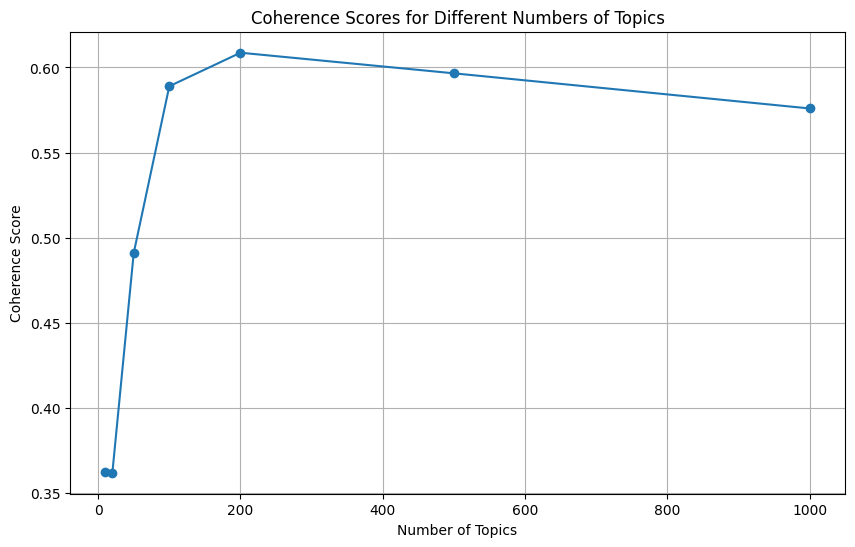


=== Top Topics for 1000 Topics ===
   Topic  Count                                   Name  \
0     -1  77474                        -1_of_the_in_to   
1      0   2476             0_lattice_qcd_quark_chiral   
2      1   1468               1_dwarfs_dust_dwarf_disk   
3      2   1452  2_solar_coronal_magnetic_reconnection   
4      3   1253       3_language_text_word_translation   
5      4   1218           4_xray_chandra_kev_xmmnewton   
6      5    868             5_grb_grbs_afterglow_burst   
7      6    860  6_neutrino_seesaw_mixing_leptogenesis   
8      7    816               7_branching_b0_pi_decays   
9      8    713                 8_s5_ads5_bethe_string   

                                      Representation  \
0     [of, the, in, to, and, we, is, that, for, are]   
1  [lattice, qcd, quark, chiral, quenched, quarks...   
2  [dwarfs, dust, dwarf, disk, brown, white, emis...   
3  [solar, coronal, magnetic, reconnection, sunsp...   
4  [language, text, word, translation, corpus

In [ ]:
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

# Prepare data for coherence calculation
texts = [text.split() for text in data]
dictionary = Dictionary(texts)

# Storage for coherence scores and topic statistics
coherence_scores = []
stats_list = []

# Function to compute coherence and show topic stats
def process_topics(original_model, docs, num_topics):
    print(f"\n=== Reducing to {num_topics} Topics ===")

    # Clone the model to avoid overwriting
    topic_model_clone = deepcopy(original_model)

    # Reduce topics
    topic_model_clone.reduce_topics(docs, nr_topics=num_topics)

    # Get topic information and print top topics
    topic_info = topic_model_clone.get_topic_info()
    print(topic_info.head(10))  # Show top 10 topics

    # Calculate coherence score
    topics_keywords = topic_model_clone.get_topics()
    topic_list = [[word for word, _ in topic[:10]] for topic in topics_keywords.values()]
    coherence_model = CoherenceModel(topics=topic_list, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Save results
    stats_list.append({"Num_Topics": num_topics, "Top_Topics": topic_info.head(10)})
    return coherence_score, topic_info

# Run for multiple topic numbers
num_topics_list = [1000, 500, 200, 100, 50, 20, 10]
for num_topics in num_topics_list:
    coherence_score, topic_info = process_topics(original_model, data, num_topics)
    coherence_scores.append({"Num_Topics": num_topics, "Coherence_Score": coherence_score})

# Convert coherence scores to a DataFrame
coherence_df = pd.DataFrame(coherence_scores)

# Display coherence scores table
print("\n=== Coherence Scores for Different Numbers of Topics ===")
print(coherence_df)

# Plot coherence scores
plt.figure(figsize=(10, 6))
plt.plot(coherence_df['Num_Topics'], coherence_df['Coherence_Score'], marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.grid()
plt.show()

# Display topic statistics for each configuration
for stat in stats_list:
    print(f"\n=== Top Topics for {stat['Num_Topics']} Topics ===")
    print(stat["Top_Topics"])
